In [214]:
import pandas as pd

In [215]:
train = pd.read_csv('../../input/final/train_final.csv').drop('Unnamed: 0', axis=1)
target = pd.read_csv('../../input/final/train_target_final.csv').drop('Unnamed: 0', axis=1).WnvPresent
test = pd.read_csv('../../input/final/test_final.csv').drop('Unnamed: 0', axis=1)

In [216]:
def write_csv(model_name, model):
    
    model_data = [item[1] for item in model.predict_proba(test)]
    
    pd.DataFrame(data=model_data).to_csv(model_name + '.csv')
    results = pd.read_csv(model_name + '.csv')
    results.columns = ['Id', 'WnvPresent']
    results.Id = results.Id.apply(lambda x : x + 1)
    results.to_csv(model_name + '.csv', index=False)

In [217]:
train.shape

(8603, 75)

In [218]:
test.shape

(116293, 75)

In [219]:
target.shape

(8603,)

In [220]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 75 columns):
Lat                      8603 non-null float64
Long                     8603 non-null float64
AddressAccuracy          8603 non-null int64
Duplicated_Rows          8603 non-null int64
Species_Fact             8603 non-null int64
Trap_Fact                8603 non-null int64
Date_Ord                 8603 non-null int64
Week                     8603 non-null int64
Year                     8603 non-null int64
Days_Since_Last_Check    8603 non-null int64
Spray_Factor             8603 non-null float64
MIFG                     8603 non-null int64
FG                       8603 non-null int64
HZ                       8603 non-null int64
FG+                      8603 non-null int64
VCFG                     8603 non-null int64
BCFG                     8603 non-null int64
DZ                       8603 non-null int64
SN                       8603 non-null int64
GR                       8603 no

In [221]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 75 columns):
Lat                      116293 non-null float64
Long                     116293 non-null float64
AddressAccuracy          116293 non-null int64
Duplicated_Rows          116293 non-null int64
Species_Fact             116293 non-null int64
Trap_Fact                116293 non-null int64
Date_Ord                 116293 non-null int64
Week                     116293 non-null int64
Year                     116293 non-null int64
Days_Since_Last_Check    116293 non-null int64
Spray_Factor             116293 non-null int64
MIFG                     116293 non-null int64
FG                       116293 non-null int64
HZ                       116293 non-null int64
FG+                      116293 non-null int64
VCFG                     116293 non-null int64
BCFG                     116293 non-null int64
DZ                       116293 non-null int64
SN                       116293 non-nul

In [222]:
def replace_none(x):
    if x == 'NaN':
        return -1
    return x

train.Temp_Wet_Bulb_both = train.Temp_Wet_Bulb_both.apply(replace_none)
test.Temp_Wet_Bulb_both = test.Temp_Wet_Bulb_both.apply(replace_none)

train.StnPressure_both = train.StnPressure_both.apply(replace_none)
test.StnPressure_both = test.StnPressure_both.apply(replace_none)

In [223]:
train = train.drop(['Day Length'], axis=1)
test = test.drop(['Day Length'], axis=1)

In [224]:
train.shape

(8603, 74)

In [225]:
test.shape

(116293, 74)

Round 1 - mildly successful

In [13]:
# train = train.drop(['Temp_Avg1'], axis=1)

In [14]:
# test = test.drop(['Temp_Avg1'], axis=1)

Round 3 - Lets go crazy - more robust

In [240]:
for key in importance.keys():
    if importance[key] == 0:
        train = train.drop([key], axis=1)
        test = test.drop([key], axis=1)

Round 4 - Let's get interesting - Got too interesting. Try with more lenient threshholds.

In [241]:
# for key in importance.keys():
#     if importance[key] < 10:
#         train = train.drop([key], axis=1)
#         test = test.drop([key], axis=1)

Round 4 - Let's get interesting - Got too interesting. Try with more lenient threshholds. Not lenient enough, apparently.

In [242]:
# for key in importance.keys():
#     if importance[key] < 5:
#         train = train.drop([key], axis=1)
#         test = test.drop([key], axis=1)

Round 5 - Even more lenient.

In [243]:
# for key in importance.keys():
#     if importance[key] < 3:
#         train = train.drop([key], axis=1)
#         test = test.drop([key], axis=1)

Round 6 - Pipiens Restuans - Didn't work - probably because interaction term is being created. Maybe if we factorized instead.

In [244]:
# train['Pipiens'] = train.apply(lambda x : 0)
# train['Restuans'] = train.apply(lambda x : 0)

# test['Pipiens'] = test.apply(lambda x : 0)
# test['Restuans'] = test.apply(lambda x : 0)

# def pip_res(row):
    
#     row['Pipiens'] = 0
#     row['Restuans'] = 0
    
#     if row.Species_Fact == 1:
#         row['Pipiens'] = 1
#         row['Restuans'] = 1
#     elif row.Species_Fact == 2:
#         row['Restuans'] = 1
#     elif row.Species_Fact == 3:
#         row['Pipiens'] = 1
    
#     return row

# train = train.apply(pip_res, axis=1)
# test = test.apply(pip_res, axis=1)

In [276]:
train.shape

(8603, 51)

In [277]:
test.shape

(116293, 51)

In [247]:
set(train.columns) - set(test.columns)

set()

In [248]:
set(test.columns) - set(train.columns)

set()

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
clf = RandomForestClassifier()

In [141]:
clf.fit(train, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [144]:
write_csv('randomforests', clf)

### XGBoost

In [249]:
import xgboost as xgb
import numpy as np
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [250]:
xgb1 = XGBClassifier(learning_rate=0.2, seed=42, silent=1) # 0.2 best so far

In [251]:
# xgbs = [XGBClassifier(learning_rate=0.2, seed=seed, silent=1) for seed in [1, 20, 42, 61, 80]]

In [252]:
# prob_preds = []

# for model in xgbs:
#     model.fit(train, target)
#     model_data = [item[1] for item in model.predict_proba(test)]
#     prob_preds.append(model_data)
    
# transposed = list(map(list, zip(*prob_preds)))
# new_preds = [np.mean(item) for item in transposed]

In [253]:
# pd.DataFrame(data=new_preds).to_csv('xg_ensem.csv')
# results = pd.read_csv('xg_ensem.csv')
# results.columns = ['Id', 'WnvPresent']
# results.Id = results.Id.apply(lambda x : x + 1)
# results.to_csv('xg_ensem.csv', index=False)

In [254]:
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['binary:logistic'],
#               'learning_rate': [2], #so called `eta` value
#               'max_depth': [2,3,4,6],
#               'min_child_weight': [1,2,3],
#               'silent': [1],
#               'subsample': [0.6, 0.8, 1],
#               'colsample_bytree': [0.8],
#               'n_estimators': [100], #number of trees, change it to 1000 for better results
#               'missing':[-999],
#               'seed': [42],
#               'reg_lambda': [0.8, 1, 1.2]}

In [255]:
xgb1.fit(train, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=1,
       subsample=1)

In [256]:
importance = dict(zip(train.columns, xgb1.feature_importances_ * 100 / max(xgb1.feature_importances_)))
importance

{'AddressAccuracy': 12.0,
 'Date_Ord': 64.0,
 'Day_Length': 99.999992,
 'Days_Since_Last_Check': 18.0,
 'Duplicated_Rows': 98.000008,
 'Ht_Cool_both': 6.0,
 'Lat': 82.0,
 'Long': 92.0,
 'PrecipTotal': 4.0,
 'PrecipTotal1': 2.0,
 'PrecipTotal10': 4.0,
 'PrecipTotal14': 14.0,
 'PrecipTotal2': 12.0,
 'PrecipTotal4': 12.0,
 'PrecipTotal7': 12.0,
 'Species_Fact': 66.0,
 'Spray_Factor': 70.0,
 'StnPressure_both': 14.0,
 'Temp_Avg1': 2.0,
 'Temp_Avg10': 14.0,
 'Temp_Avg14': 24.0,
 'Temp_Avg2': 2.0,
 'Temp_Avg4': 16.0,
 'Temp_Avg7': 16.0,
 'Temp_Avg_both': 10.000001,
 'Temp_Dew_Point1': 21.999998,
 'Temp_Dew_Point10': 8.0,
 'Temp_Dew_Point14': 24.0,
 'Temp_Dew_Point2': 6.0,
 'Temp_Dew_Point4': 14.0,
 'Temp_Dew_Point7': 6.0,
 'Temp_Dew_Point_both': 6.0,
 'Temp_Max1': 6.0,
 'Temp_Max10': 18.0,
 'Temp_Max14': 6.0,
 'Temp_Max2': 2.0,
 'Temp_Max4': 6.0,
 'Temp_Max7': 8.0,
 'Temp_Max_both': 6.0,
 'Temp_Min1': 8.0,
 'Temp_Min10': 6.0,
 'Temp_Min14': 8.0,
 'Temp_Min2': 4.0,
 'Temp_Min4': 8.0,
 'Temp_M

In [257]:
from matplotlib import pyplot as plt

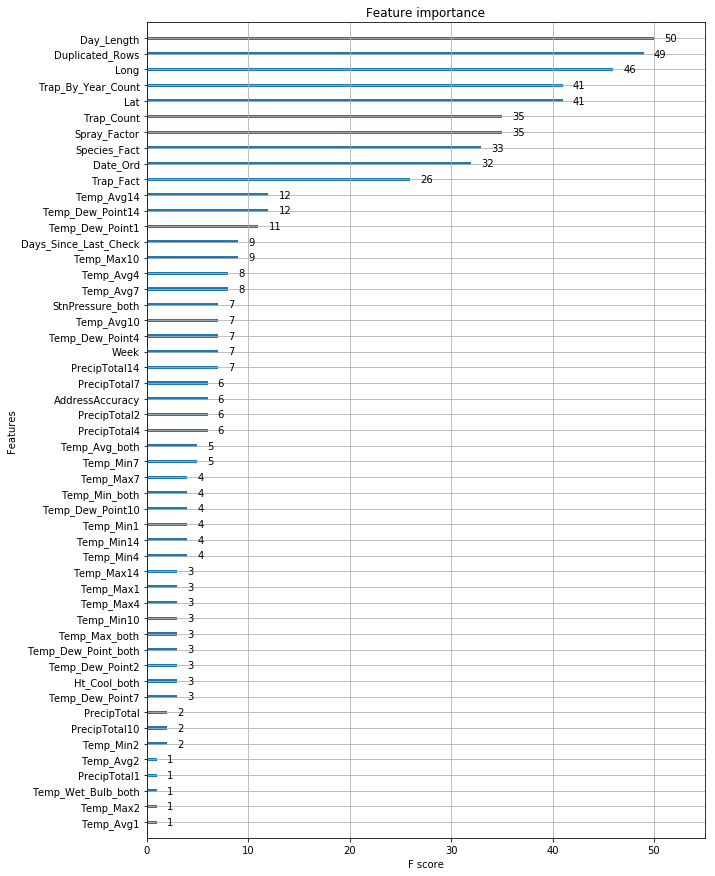

In [258]:
# plot feature importance
fig, ax = plt.subplots(figsize=(10, 15))
plot_importance(xgb1, ax=ax)
plt.show()

In [259]:
# model_data = [item[1] for item in xgb1.predict_proba(test)]

# test['Pred'] = pd.Series(model_data)
# test['Year'] = pd.read_csv('../../input/final/test_final.csv').Year
# test.head()

# def weight_preds(row):
#     new_pred = row.Pred
#     if row.Year == 2012:
#         new_pred = row.Pred * 3
#         if new_pred > 0.99:
#             new_pred = 0.99
#     return new_pred
    
# test['Pred'] = test.apply(weight_preds, axis=1)

# model_data = test['Pred'].values

# pd.DataFrame(data=model_data).to_csv('weighted_xg.csv')
# results = pd.read_csv('weighted_xg.csv')
# results.columns = ['Id', 'WnvPresent']
# results.Id = results.Id.apply(lambda x : x + 1)
# results.to_csv('weighted_xg.csv', index=False)

In [261]:
# train_DM = xgb.DMatrix(train.values, label=target.values)
# test_DM = xgb.DMatrix(test.values)

In [264]:
# params = {'objective':'binary:logistic', 'max_depth':3, 'eta':0.2}
# xgb2 = xgb.train(params, train_DM)

In [274]:
# model_data = xgb2.predict(test_DM)

In [275]:
# pd.DataFrame(data=model_data).to_csv('xgboost_legit.csv')
# results = pd.read_csv('xgboost_legit.csv')
# results.columns = ['Id', 'WnvPresent']
# results.Id = results.Id.apply(lambda x : x + 1)
# results.to_csv('xgboost_legit.csv', index=False)

In [260]:
write_csv('xgboost', xgb1)

### Neural Net - Lasagne

In [314]:
from lasagne.layers import InputLayer, DropoutLayer, DenseLayer
from lasagne.updates import nesterov_momentum
from lasagne.objectives import binary_crossentropy
from nolearn.lasagne import NeuralNet
import theano
from theano import tensor as T
from theano.tensor.nnet import sigmoid
from sklearn import metrics
from sklearn.utils import shuffle

In [318]:
class AdjustVariable(object):
    def __init__(self, variable, target, half_life=20):
        self.variable = variable
        self.target = target
        self.half_life = half_life
    def __call__(self, nn, train_history):
        delta = self.variable.get_value() - self.target
        delta /= 2**(1.0/self.half_life)
        self.variable.set_value(np.float32(self.target + delta))

In [322]:
X = train.values.astype(np.int32)
y = target.values.astype(np.int32)

In [324]:
input_size = len(X[0])

learning_rate = theano.shared(np.float32(0.1))

net = NeuralNet(
layers=[  
    ('input', InputLayer),
     ('hidden1', DenseLayer),
    ('dropout1', DropoutLayer),
    ('hidden2', DenseLayer),
    ('dropout2', DropoutLayer),
    ('output', DenseLayer),
    ],
    # layer parameters:
    input_shape=(None, input_size), 
    hidden1_num_units=256, 
    dropout1_p=0.4,
    hidden2_num_units=256, 
    dropout2_p=0.4,
    output_nonlinearity=sigmoid, 
    output_num_units=1, 

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=learning_rate,
    update_momentum=0.9,

    # Decay the learning rate
    on_epoch_finished=[
            AdjustVariable(learning_rate, target=0, half_life=4),
            ],

    # This is silly, but we don't want a stratified K-Fold here
    # To compensate we need to pass in the y_tensor_type and the loss.
    regression=True,
    y_tensor_type = T.imatrix,
    objective_loss_function = binary_crossentropy,

    max_epochs=32, 
    train_split=0.1,
    verbose=1,
    )

In [325]:
net = fit(train, target)

NameError: name 'fit' is not defined

In [ ]:
probas = net.predict_proba(train)
print("ROC score", metrics.roc_auc_score(y_valid, probas))

In [266]:
write_csv('lasagne', net)

### Neural Net - Keras

In [415]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from keras import optimizers

In [416]:
X = train.values
y = target.values

In [417]:
model = Sequential()

In [418]:
model.add(Dense(32, input_shape=(train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))

model.add(Dense(output_dim))
model.add(Activation('softmax'))

In [419]:
# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy')

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [420]:
model.fit(X, y, epochs=100, batch_size=16)

Epoch 1/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 2/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 3/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 4/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 5/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 6/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 7/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 8/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 9/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 10/100
8603/8603 [==============================] - 0s - loss: 15.0955 - acc: 0.0531     
Epoch 11/100
8603/8603 [=========================

KeyboardInterrupt: 

In [381]:
model_data = [item[0] for item in model.predict_proba(test.as_matrix())]
model_name = 'keras'

pd.DataFrame(data=model_data).to_csv(model_name + '.csv')
results = pd.read_csv(model_name + '.csv')
results.columns = ['Id', 'WnvPresent']
results.Id = results.Id.apply(lambda x : x + 1)
results.to_csv(model_name + '.csv', index=False)

111520/116293 [===========================>..] - ETA: 0s